In [26]:
from skimage import io, morphology, filters, segmentation
from skimage.color import rgb2gray, rgba2rgb
import matplotlib.pyplot as plt
import numpy as np
from src.preprocessing import process_video,get_video
from skimage.color import label2rgb

plt.rcParams['image.cmap'] = 'gray'

In [27]:
label_video = get_video('images/cheese_gel.avi', threshold=None, skip_size=239)
# im = io.imread("images/last_pic_zoomed.png")

Text(0.5, 1.0, 'Rest')

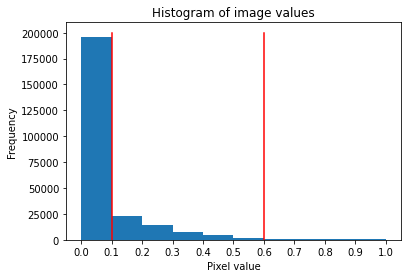

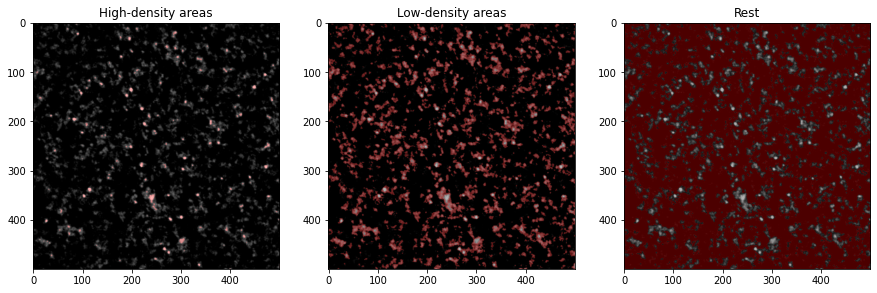

In [32]:
im = label_video[1][200:700,200:700]
# plt.axis("off")
# plt.tight_layout()
# plt.imshow(im)
n, bins, patches = plt.hist(im.flatten(), bins=10)
plt.xticks(bins)
thr1 = 0.1
thr2 = 0.6
plt.plot([thr1, thr1], [0, 200000], 'r-')
plt.plot([thr2, thr2], [0, 200000], 'r-')
plt.xlabel('Pixel value')
plt.ylabel('Frequency')
plt.title('Histogram of image values')
# plt.show()


hi_dens = im > thr2
low_dens = np.logical_and(im > thr1, im < thr2)
rest = np.logical_not(np.logical_or(hi_dens,low_dens))

image_label_overlay_hi = label2rgb(hi_dens, image=im)
image_label_overlay_low = label2rgb(low_dens, image=im)
image_label_overlay_rest = label2rgb(rest, image=im)

fig, ax = plt.subplots(1, 3, figsize=(15,5)) # figsize sets size in inches
ax[0].imshow(image_label_overlay_hi,cmap='gray')
ax[0].set_title('High-density areas')
ax[1].imshow(image_label_overlay_low,cmap='gray')
ax[1].set_title('Low-density areas')
ax[2].imshow(image_label_overlay_rest,cmap='gray')
ax[2].set_title('Rest')

In [29]:
print(im.shape)
print(im)
# plt.savefig('last_pic_zoomed.png', bbox_inches='tight')

(500, 500)
[[0.01176471 0.01568627 0.03921569 ... 0.         0.         0.00392157]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.00392157 0.01176471 0.03137255]
 ...
 [0.         0.         0.00392157 ... 0.48235294 0.55294118 0.45490196]
 [0.00392157 0.06666667 0.09803922 ... 0.30980392 0.36862745 0.29019608]
 [0.         0.08627451 0.1254902  ... 0.10980392 0.15686275 0.11372549]]
